In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [15]:
def load_coffee_data():
    # Simulate coffee roasting data
    np.random.seed(0)  # For reproducibility

    # Generate temperature data (in degrees Celsius, e.g., 150°C to 250°C)
    temperature = np.random.uniform(150, 250, 100)

    # Generate time duration data (in minutes, e.g., 5 to 20 minutes)
    time_duration = np.random.uniform(5, 20, 100)

    # Combine temperature and time_duration into a feature matrix X
    X = np.column_stack((temperature, time_duration))

    # Define a simple rule for labels:
    # Beans are roasted (label = 1) if the temperature is between 180 and 220
    # and the time is between 10 and 15 minutes
    Y = ((temperature > 180) & (temperature < 220) & 
         (time_duration > 10) & (time_duration < 15)).astype(int)

    return X, Y


In [17]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(100, 2) (100,)


In [19]:
print(X[0], Y[0])

[204.88135039  15.16724805] 0


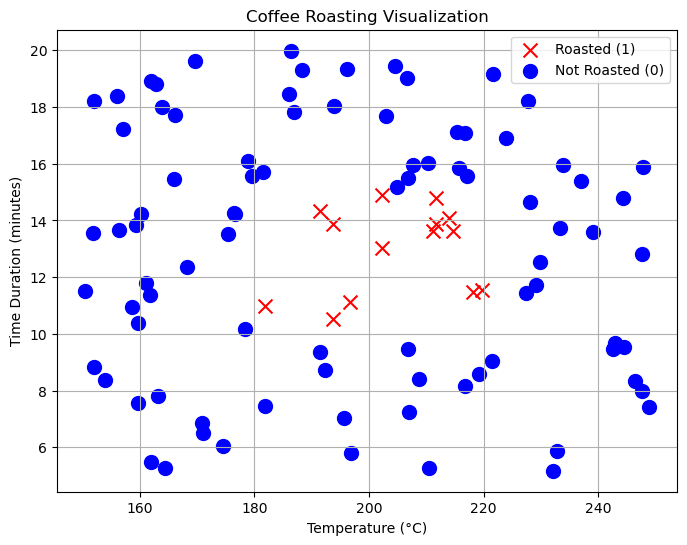

In [23]:
# Separate roasted and not roasted data
roasted = X[Y == 1]
not_roasted = X[Y == 0]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot roasted beans (cross sign)
plt.scatter(roasted[:, 0], roasted[:, 1], c='red', marker='x', label='Roasted (1)', s=100)

# Plot not roasted beans (circle sign)
plt.scatter(not_roasted[:, 0], not_roasted[:, 1], c='blue', marker='o', label='Not Roasted (0)', s=100)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Time Duration (minutes)')
plt.title('Coffee Roasting Visualization')
plt.legend()
plt.grid(True)

In [25]:

tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.42064446  0.7176889  -1.049585  ]
 [ 0.84506893  0.07283664 -0.15199858]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.6253712 ]
 [-0.79268396]
 [ 0.773571  ]] 
b2(1,): [0.]


In [35]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)

In [47]:
Xt = np.tile(Xn,(100,1))
Yt= np.tile(Y,(100,1))   
print(Xt.shape, Yt.shape)   

(1000, 2) (100, 100)


In [49]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
     metrics=['accuracy'] 
)

model.fit(
    Xn,Y,            
    epochs=10,
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8586 - loss: 0.4967
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8586 - loss: 0.4769
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8586 - loss: 0.4604
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8586 - loss: 0.4468
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8586 - loss: 0.4359
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8586 - loss: 0.4274
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8586 - loss: 0.4211
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8586 - loss: 0.4165
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8586 - loss: 0.4133
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8586 - loss: 0.4112
